In [50]:
import time
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

## Functions

In [51]:
def find_triangle(n):
    # timer
    start = time.time()

    # create symmetric adjacency matrix with randomized edge values [0, 1]
    adj_matrix = random.choice([0, 1], size=(n, n))
    adj_matrix= np.tril(adj_matrix) + np.tril(adj_matrix, -1).T

    # set diagonal to 1
    np.fill_diagonal(adj_matrix, 1)

    # loop through rows
    for u in range(n):

        # loop through columns 
        for v in range(u+1, n):
            if adj_matrix[u][v] == 1:
                
                # check if there are edges connecting both (u,v) to third vertex w
                for w in range(v+1, n):
                    if adj_matrix[u][w] == 1 and adj_matrix[v][w] == 1:
                        
                        # triangle exists
                        time_taken = time.time() - start
                        return True, time_taken 
    # no triangle
    time_taken = time.time() - start
    return False, time_taken

In [52]:
def count_triangle(n):

    # timer
    start = time.time()
    # create symmetric adjacency matrix with randomized edge values [0, 1]
    adj_matrix = random.choice([0, 1], size=(n, n))
    adj_matrix= np.tril(adj_matrix) + np.tril(adj_matrix, -1).T

    # set diagonal to 1
    np.fill_diagonal(adj_matrix, 1)

    counter = 0

    # loop through rows
    for u in range(n):

        # loop through columns 
        for v in range(u+1, n):
            if adj_matrix[u][v] == 1:
                
                # check if there are edges connecting both (u,v) to third vertex w
                for w in range(v+1, n):
                    if adj_matrix[u][w] == 1 and adj_matrix[v][w] == 1:
                        # triangle found
                        counter+=1
    
    # total number of triangles
    time_taken = time.time() - start
    return counter, time_taken

## Find triangle run times

In [63]:
runtime_dict = {}

iterations = 15
for exponent in range(5, 12):
    n = 2**exponent
    find_times = []
    for i in range(iterations):
        find_times.append(find_triangle(n)[1])

    runtime_dict[n] = np.mean(find_times)

In [64]:
runtime_dict

{32: 0.00017345746358235676,
 64: 7.870992024739583e-05,
 128: 0.00035578409830729166,
 256: 0.0005096753438313802,
 512: 0.002144749959309896,
 1024: 0.0077910264333089195,
 2048: 0.03480976422627767}

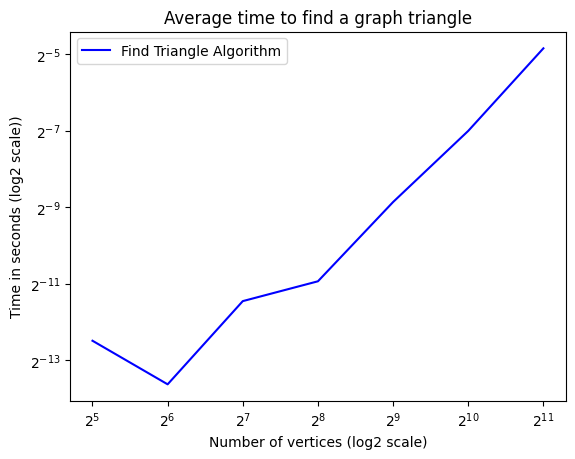

In [ ]:
times = sorted(runtime_dict.items())
x, y = zip(*times)

plt.plot(x, y, color='blue', label='Find Triangle Algorithm')

plt.title(f'Average time to find a graph triangle')
plt.legend()
plt.ylabel('Time in seconds (log2 scale))')
plt.xlabel('Number of vertices (log2 scale)')
plt.yscale('log', base=2)
plt.xscale('log', base=2)

## Count triangles run times

In [66]:
counting_runtime_dict = {}

iterations = 15
for exponent in range(5, 12):
    n = 2**exponent
    count_times = []
    for i in range(iterations):
        count_times.append(count_triangle(n)[1])

    counting_runtime_dict[n] = np.mean(count_times)

In [ ]:
counting_runtime_dict

{32: 0.0008277734120686849,
 64: 0.004104709625244141,
 128: 0.027167908350626626,
 256: 0.2114303747812907,
 512: 1.8280274232228597,
 1024: 14.693639691670736,
 2048: 118.19985984166463}

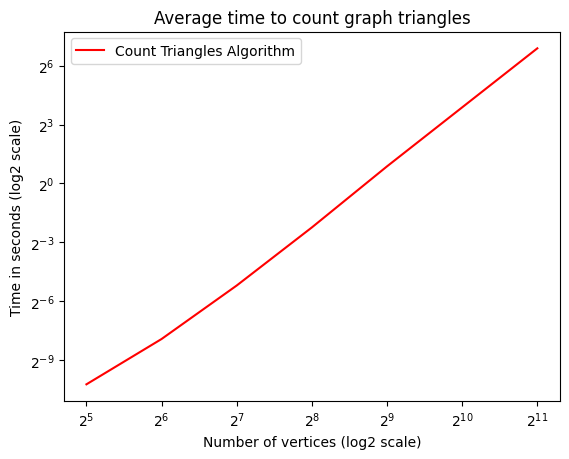

In [68]:
times = sorted(counting_runtime_dict.items())
x, y = zip(*times)

plt.plot(x, y, label='Count Triangles Algorithm', color='red')
plt.title(f'Average time to count graph triangles')
plt.legend()
plt.ylabel('Time in seconds (log2 scale)')
plt.xlabel('Number of vertices (log2 scale)')
plt.yscale('log', base=2)
plt.xscale('log', base=2)

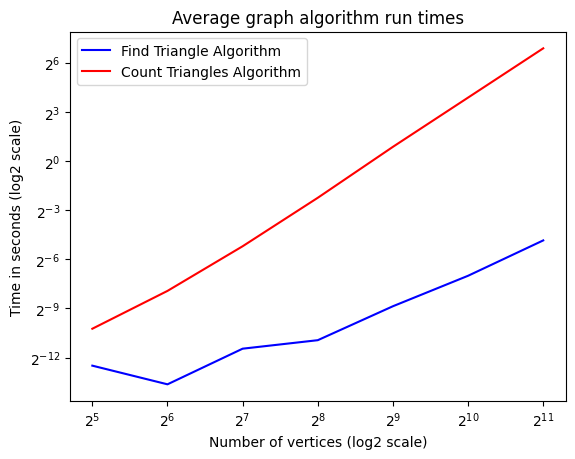

In [ ]:
times = sorted(runtime_dict.items())
x, y = zip(*times)

plt.plot(x, y, color='blue', label='Find Triangle Algorithm')

times = sorted(counting_runtime_dict.items())
x, y = zip(*times)

plt.plot(x, y, label='Count Triangles Algorithm', color='red')
plt.title(f'Average graph algorithm run times')
plt.legend()
plt.ylabel('Time in seconds (log2 scale)')
plt.xlabel('Number of vertices (log2 scale)')
plt.yscale('log', base=2)
plt.xscale('log', base=2)